# 🧱 GANs on Lego Data - Generate

## Table of contents
0. [Parameters](#parameters)
1. [Prepare the Data](#prepare)
2. [Load the Model](#model)
3. [Reconstruct using the autoencoder](#reconstruct)
4. [Embed using the encoder](#encode)
5. [Generate using the decoder](#decode)
6. [Explore the latent space](#explore)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%html
<style>table {display: inline-block}</style>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    Conv2DTranspose,
    Flatten,
    Dense,
    Reshape,
    Layer,
    BatchNormalization,
    LeakyReLU,
)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback
from tensorflow.keras.losses import binary_crossentropy, BinaryCrossentropy
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.metrics import Mean
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import array_to_img

from utils.image import preprocess, display
from utils.datasets import sample_batches, sample_batch
from utils.losses import root_mean_squared_error

ImportError: cannot import name 'preprocess' from 'utils.image' (/app/utils/image.py)

## 0. Parameters <a name="parameters"></a>

In [ ]:
IMAGE_SIZE = 64
CHANNELS = 1
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
Z_DIM = 128
EPOCHS = 100
NUM_FEATURES = 128

## 1. Prepare the data <a name="prepare"></a>

In [ ]:
# Load the data
test_data = image_dataset_from_directory(
    "/app/data/lego-brick-images/dataset/",
    labels=None,
    color_mode="grayscale",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    interpolation="bilinear",
)

In [ ]:
def preprocess(img):
    """
    Normalize and reshape the images
    """
    img = tf.cast(img, "float32") / 255.0
    return img


test = test_data.map(lambda x: preprocess(x))

## 2. Load the models <a name="model"></a>

In [8]:
## Load the model trained in 01_train.ipynb
generator = load_model("./models/generator", compile=False)
discriminator = load_model("./models/discriminator", compile=False)

## 5. Generate new faces <a name="decode"></a>

In [10]:
# Sample some points in the latent space, from the standard normal distribution
grid_width, grid_height = (10, 3)
z_sample = np.random.normal(size=(grid_width * grid_height, Z_DIM))

In [11]:
# Decode the sampled points
reconstructions = generator.predict(z_sample)

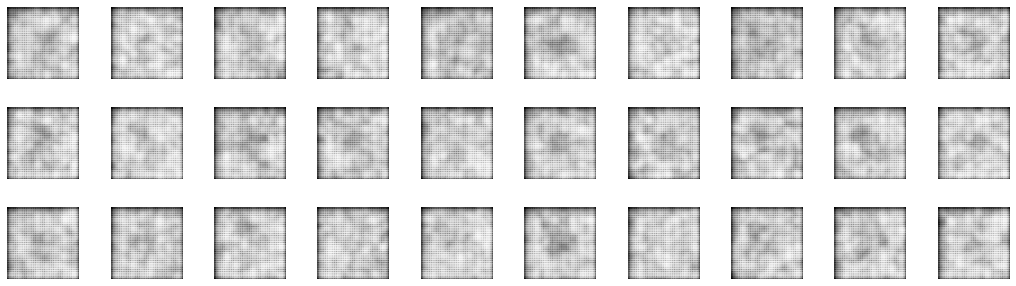

In [13]:
# Draw a plot of decoded images
fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Output the grid of faces
for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")